# Jack’s Car Rental

This notebook explores Jack's Car Rental problem, a classic case study from Sutton and Barto's "Reinforcement Learning: An Introduction."
The problem is a study in optimal policy finding for a two-location car rental service, aiming to maximize profit through strategic car transfers. We determine the best action for any given state by employing policy iteration, a core dynamic programming algorithm. The results, including the policy and value function, are visualized for unambiguous interpretation.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jacks_car_rental_class import JacksCarRental

## Run Jack’s Car Rental Simulation

In [2]:
MAX_N_CARS = 20

jacks_car_rental = JacksCarRental(max_n_car=MAX_N_CARS)
policy_history, value_function_history = jacks_car_rental.policy_iteration()

Policy Evaluation - Iteration 1: Max ΔV = 193.338751
Policy Evaluation - Iteration 2: Max ΔV = 133.993127
Policy Evaluation - Iteration 3: Max ΔV = 90.441225
Policy Evaluation - Iteration 4: Max ΔV = 67.589882
Policy Evaluation - Iteration 5: Max ΔV = 53.576676
Policy Evaluation - Iteration 6: Max ΔV = 41.712776
Policy Evaluation - Iteration 7: Max ΔV = 32.712453
Policy Evaluation - Iteration 8: Max ΔV = 26.080436
Policy Evaluation - Iteration 9: Max ΔV = 21.771751
Policy Evaluation - Iteration 10: Max ΔV = 18.312070
Policy Evaluation - Iteration 11: Max ΔV = 15.361866
Policy Evaluation - Iteration 12: Max ΔV = 12.855959
Policy Evaluation - Iteration 13: Max ΔV = 10.734693
Policy Evaluation - Iteration 14: Max ΔV = 8.944874
Policy Evaluation - Iteration 15: Max ΔV = 7.439441
Policy Evaluation - Iteration 16: Max ΔV = 6.176934
Policy Evaluation - Iteration 17: Max ΔV = 5.121008
Policy Evaluation - Iteration 18: Max ΔV = 4.240002
Policy Evaluation - Iteration 19: Max ΔV = 3.506516
Policy

## Policy Iterations

/tmp/ipykernel_78738/1442310028.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


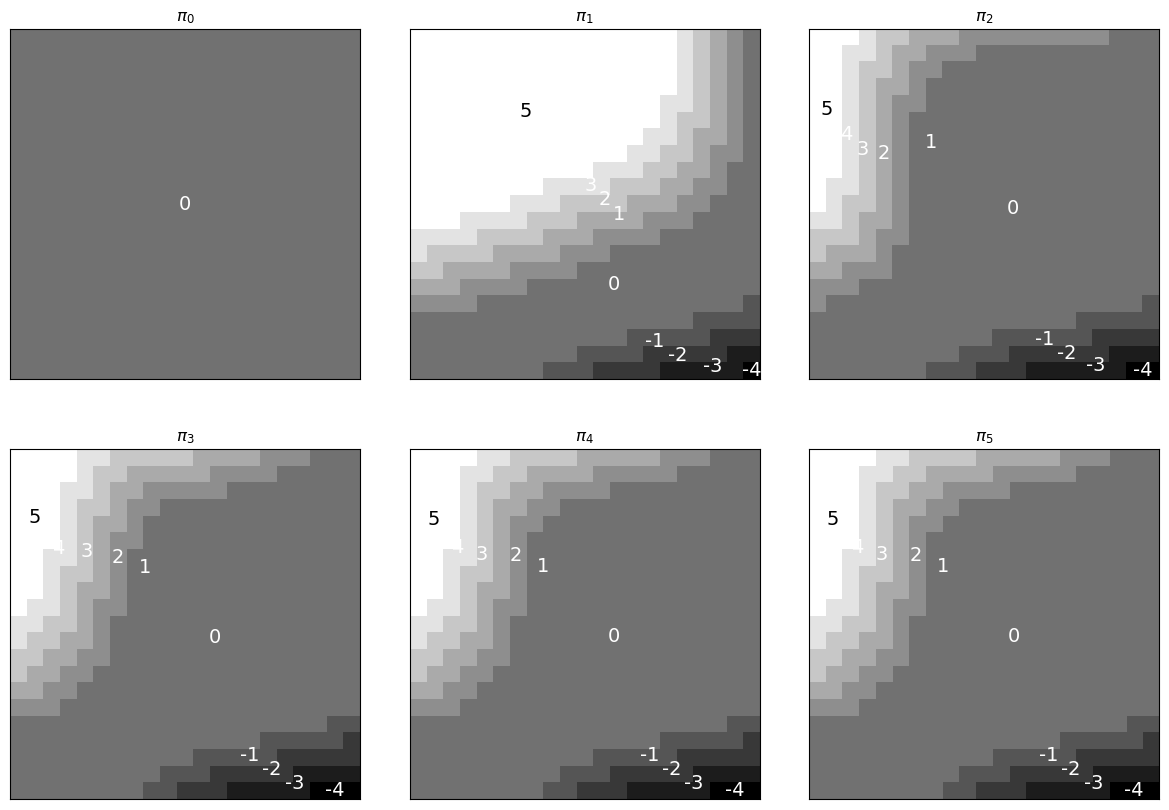

In [6]:
global_min = min(policy.min() for policy in policy_history)
global_max = max(policy.max() for policy in policy_history)

fig, axes = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
axes = axes.flatten() 

for i, ax in enumerate(axes):
    policy = policy_history[i]
    cax = ax.imshow(policy, cmap='gray', interpolation='nearest', origin='lower', vmin=global_min, vmax=global_max)
    ax.set_title(f'$\\pi_{{{i}}}$') 
    ax.set_xticks([])  
    ax.set_yticks([]) 

    unique_values = np.unique(policy)
    for value in unique_values:
        indices = np.argwhere(policy == value)
        central_position = np.mean(indices, axis=0)
        ax.text(central_position[1], central_position[0], str(value), ha='center', va='center', 
                color='white' if value < (global_max - global_min) / 2 else 'black', fontsize=14)

plt.tight_layout()
plt.show()

## Final Value Function

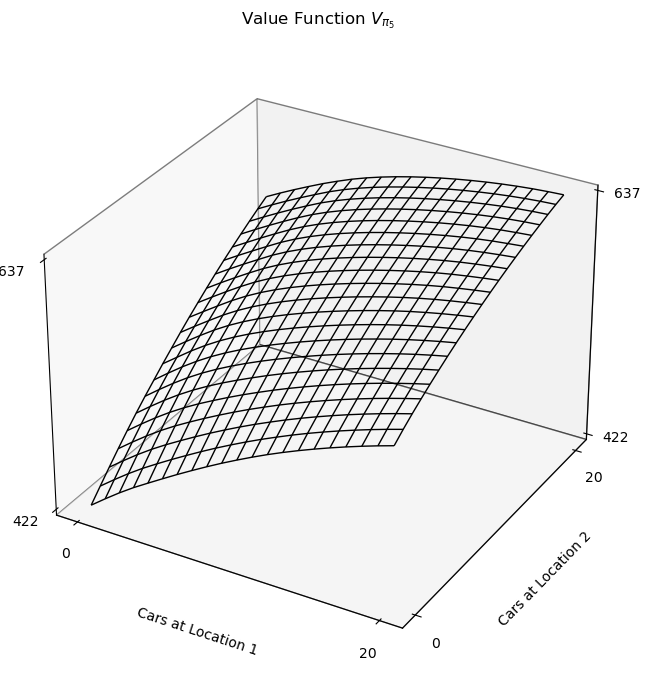

In [7]:
value_function = value_function_history[-1]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(0, MAX_N_CARS + 1, 1)
Y = np.arange(0, MAX_N_CARS + 1, 1)
X, Y = np.meshgrid(X, Y)
Z = value_function[X, Y]

wireframe = ax.plot_wireframe(X, Y, Z, color='black', linewidth=1)

ax.set_xticks([0, MAX_N_CARS])
ax.set_yticks([0, MAX_N_CARS])
ax.set_zticks([np.ceil(value_function.min()), np.ceil(value_function.max())])

ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

ax.grid(False)

ax.xaxis.line.set_visible(True)
ax.yaxis.line.set_visible(True)
ax.zaxis.line.set_visible(True)
ax.zaxis.set_ticks_position('both')

ax.set_facecolor('white')

ax.set_xlabel('Cars at Location 1', labelpad=10)
ax.set_ylabel('Cars at Location 2', labelpad=10)
ax.set_zlabel('Value', labelpad=10)
ax.set_title('Value Function $V_{\\pi_5}$', pad=20)

ax.tick_params(axis='x', which='major', pad=5)
ax.tick_params(axis='y', which='major', pad=5)
ax.tick_params(axis='z', which='major', pad=5)

plt.show();